import Packages

In [1]:
from Kalman_Filter import KalmanFilter
from track import tracking_object, Track

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Generate Datas

For example, there will be 4 frames, each frame contains 3 cars, the filter will label and track each of them.

We have the position of cars.

In [2]:
car_1 = np.array([20.0, 30.0, 1.5])
car_2 = np.array([30.0, 40.0, 1.3])
car_3 = np.array([24.5, 12.5, 1.0])
frame_1 = [car_1, car_2, car_3]

car_1 = np.array([25.0, 30.0, 1.5])
car_2 = np.array([33.0, 41.0, 1.3])
car_3 = np.array([24.4, 11.5, 1.0])
frame_2 = [car_1, car_2, car_3]

car_1 = np.array([30.0, 31.0, 1.5])
car_2 = np.array([30.0, 41.0, 1.3])
car_3 = np.array([21.4, 11.5, 1.0])
frame_3 = [car_1, car_2, car_3]

car_1 = np.array([35.0, 32.0, 1.5])
car_2 = np.array([29.5, 41.0, 1.3])
car_3 = np.array([20.4, 11.5, 1.0])
frame_4 = [car_1, car_2, car_3]

frames = [frame_1, frame_2, frame_3, frame_4]


Plot example in each frame

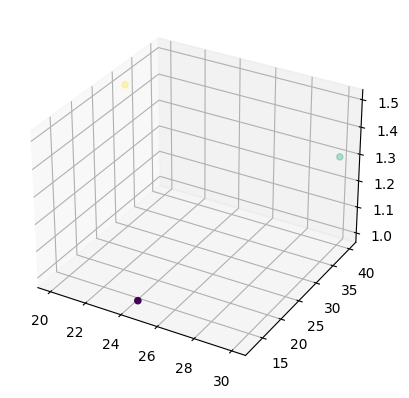

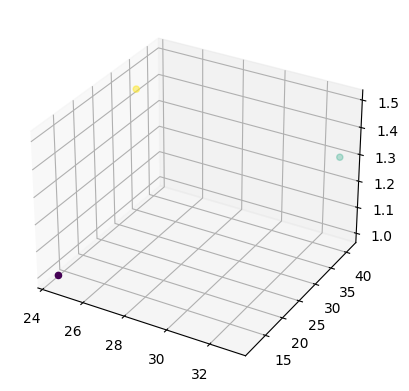

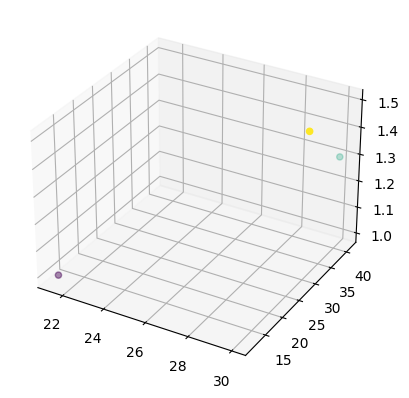

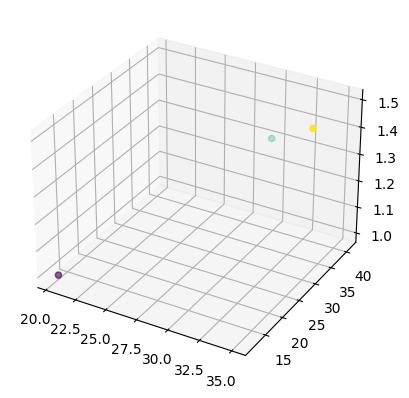

In [3]:
for frame in frames:
    x = [frame[i][0] for i in range(len(frame))]
    y = [frame[i][1] for i in range(len(frame))]
    z = [frame[i][2] for i in range(len(frame))]

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(x, y, z, c=z, cmap = 'viridis')

    plt.show()

Track

In [4]:
tracking_objects = []
for i in range(len(frames)):
    frame = frames[i]
    print(f"frame{i + 1}")

    Track(frame, tracking_objects)
            


frame1
car1 [20.  30.   1.5  0.   0.   0. ]
car2 [30.  40.   1.3  0.   0.   0. ]
car3 [24.5 12.5  1.   0.   0.   0. ]
frame2
car1 [24.  30.   1.5  0.   0.   0. ]
car2 [32.4 40.8  1.3  0.   0.   0. ]
car3 [24.42 11.7   1.    0.    0.    0.  ]
frame3
car1 [30.14020029 31.12893983  1.5         1.78826896  0.35816619  0.        ]
car2 [29.7975337  41.02350055  1.3        -0.79867101  0.07033061  0.        ]
car3 [21.00490723 11.46663643  1.         -1.08490477 -0.07594736  0.        ]
frame4
car1 [36.30740646 32.41454958  1.5         2.81874387  0.61692058  0.        ]
car2 [28.67230851 41.0685984   1.3        -0.88961269  0.06329155  0.        ]
car3 [19.21960108 11.42797522  1.         -1.29031895 -0.06506158  0.        ]
